# Partie I - Exploration du Jeu de Données du système Ford GoBike
## par Lamine Bellilet

## Introduction
 Le système Ford Gobike permet l'utilisation de vélos à disponibilité sur certaines stations aux fins de la circulation à travers la baie de San Francisco. Ce jeu de données contient des informations sur des trajets effectués via ce service durant le mois de Février de 2019, à savoir :


- la durée du trajet en secondes (duration_sec),
- l'heure du départ (start_time),
- l'heure à l'arrêt (end_time),
- les noms et identifiants de la station de départ et d'arrêt (start_station_id, start_station_name, end_station_id, end_station_name),
- types d'utilisateurs (user_type): client ou abonné; l'année de sa naissance et son sexe (member_birth_year, member_gender),
- le status de l'utilisateur vis-à-vis le programme "bike share for all" destiné aux résidents à faible revenu (bike_share_for_all_trip)

## Preliminary Wrangling


In [1]:
# le code marche pour la version 0.9.0 de seaborn
!pip install seaborn --upgrade

    100% |████████████████████████████████| 296kB 10.5MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 4.1MB/s eta 0:00:01   47% |███████████████▏                | 5.5MB 28.4MB/s eta 0:00:01    71% |██████████████████████▉         | 8.2MB 27.7MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 855kB/s eta 0:00:01   18% |██████                          | 9.1MB 26.3MB/s eta 0:00:02    20% |██████▋                         | 10.3MB 26.1MB/s eta 0:00:02    23% |███████▌                        | 11.5MB 26.1MB/s eta 0:00:02    28% |█████████                       | 13.9MB 25.1MB/s eta 0:00:02    30% |█████████▉                      | 15.1MB 25.3MB/s eta 0:00:02    37% |████████████▏                   | 18.7MB 25.6MB/s eta 0:00:02    42% |█████████████▊                  | 21.2MB 24.7MB/s eta 0:00:02    45% |██████████████▌                 | 22.4MB 24.6MB/s eta 0:00:02    54% |██████████████

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
from numpy import median
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [3]:
gobike_df =  pd.read_csv('201902-fordgobike-tripdata.csv')
print(gobike_df.shape)
gobike_df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
print(gobike_df.user_type.unique())
print(gobike_df.member_gender.unique())
print(gobike_df.bike_share_for_all_trip.unique())

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


### Observation

Il y a des données manquantes dans les colonnes start_station_id, start_station_name, end_station_id, end_station_id, member_birth_year et member_gender. Dans cette dernière, ils ont aussi la valeur de "Other", en plus de "nan".

Certaines colonnes ne sont pas du type approprié :
   - start_time et end_time : datetime
   - start_station_id et end_station_id : int64
   - user_type, member_gender et bike_share_for_all_trip : category.

### Supprimer les valeurs manquantes et corriger les types

In [6]:
# créer une copie du dataframe initial
# les modifications et analyses seront faites sur la copie
gobike = gobike_df.copy()
gobike = gobike.dropna().reset_index(drop=True).copy()

# certaines données manquantes de la colonne member_gender sont enregistrés comme "Other"
nan_inds = gobike.query('member_gender =="Other"').index
gobike = gobike.drop(index=nan_inds).reset_index(drop=True).copy()
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171305 entries, 0 to 171304
Data columns (total 16 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null object
end_time                   171305 non-null object
start_station_id           171305 non-null float64
start_station_name         171305 non-null object
start_station_latitude     171305 non-null float64
start_station_longitude    171305 non-null float64
end_station_id             171305 non-null float64
end_station_name           171305 non-null object
end_station_latitude       171305 non-null float64
end_station_longitude      171305 non-null float64
bike_id                    171305 non-null int64
user_type                  171305 non-null object
member_birth_year          171305 non-null float64
member_gender              171305 non-null object
bike_share_for_all_trip    171305 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 20.9+ MB


In [7]:
gobike['start_time']=pd.to_datetime(gobike['start_time'])
gobike['end_time']=pd.to_datetime(gobike['end_time'])
gobike['start_station_id']=gobike.start_station_id.astype('int64')
gobike['end_station_id']=gobike.end_station_id.astype('int64')
gobike['user_type'] = gobike.user_type.astype('category')
gobike['member_gender'] = gobike.member_gender.astype('category')
gobike['bike_share_for_all_trip'] = gobike.bike_share_for_all_trip.astype('category')
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171305 entries, 0 to 171304
Data columns (total 16 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null int64
start_station_name         171305 non-null object
start_station_latitude     171305 non-null float64
start_station_longitude    171305 non-null float64
end_station_id             171305 non-null int64
end_station_name           171305 non-null object
end_station_latitude       171305 non-null float64
end_station_longitude      171305 non-null float64
bike_id                    171305 non-null int64
user_type                  171305 non-null category
member_birth_year          171305 non-null float64
member_gender              171305 non-null category
bike_share_for_all_trip    171305 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(4), obje

### Vérifier s'il y a des données aberrantes

In [8]:
# la collecte étant publiée en 2019, l'âge est calculer par rapport à cette année
gobike.query('2019-member_birth_year > 75')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1217,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
1960,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107,17th St at Dolores St,37.763015,-122.426497,89,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941.0,Male,No
4873,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70,Central Ave at Fell St,37.773311,-122.444293,71,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No
4923,1396,2019-02-28 13:21:36.678,2019-02-28 13:44:53.057,22,Howard St at Beale St,37.789756,-122.394643,74,Laguna St at Hayes St,37.776435,-122.426244,623,Subscriber,1943.0,Female,No
4939,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84,Duboce Park,37.769201,-122.433812,71,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No
5111,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84,Duboce Park,37.769201,-122.433812,72,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No
10189,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
12879,554,2019-02-27 15:09:41.550,2019-02-27 15:18:55.971,27,Beale St at Harrison St,37.788059,-122.391865,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5855,Subscriber,1942.0,Male,No
15165,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
16969,366,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50,2nd St at Townsend St,37.780526,-122.390288,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No


In [9]:
gobike.member_birth_year.describe()

count    171305.000000
mean       1984.839351
std          10.116083
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [10]:
# une vue d'ensemble de la durée en minutes
gobike.duration_sec.describe()/60

count    2855.083333
mean       11.629300
std        26.287562
min         1.016667
25%         5.366667
50%         8.483333
75%        13.116667
max      1409.133333
Name: duration_sec, dtype: float64

In [11]:
# une vue d'ensemble de la durée en heures
gobike.duration_sec.describe()/3600

count    47.584722
mean      0.193822
std       0.438126
min       0.016944
25%       0.089444
50%       0.141389
75%       0.218611
max      23.485556
Name: duration_sec, dtype: float64

### Observation 

> La colonne duration_sec ne devrait pas contenir des durées > 60, si on se fie à la tarification du système Ford Gobike, mais c'est le cas. 

## Feature Engineering

### Jours de semaine

In [12]:
# créeer une catégorie ordonnée des jours de la semaine
week_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
  
def to_weekday(d):
    """
    selon le calendrier de 2019:
    1er Février : 'friday' (indexe 4 dans la liste week_days)
    le jour s'obtient donc en ajoutant 3 à la date
    le calcul est modulo 7 pour correspondre au nombre de jours de la semaine
    """
    return week_days[(d+3)%7]

gobike['week_day'] = gobike.start_time.dt.day.apply(to_weekday)
print(gobike.info())
gobike.sample(5).week_day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171305 entries, 0 to 171304
Data columns (total 17 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null int64
start_station_name         171305 non-null object
start_station_latitude     171305 non-null float64
start_station_longitude    171305 non-null float64
end_station_id             171305 non-null int64
end_station_name           171305 non-null object
end_station_latitude       171305 non-null float64
end_station_longitude      171305 non-null float64
bike_id                    171305 non-null int64
user_type                  171305 non-null category
member_birth_year          171305 non-null float64
member_gender              171305 non-null category
bike_share_for_all_trip    171305 non-null category
week_day                   171305 non-null object
dtypes: category

148913      tuesday
65987       tuesday
85230      saturday
121121       sunday
63837     wednesday
Name: week_day, dtype: object

In [13]:
# convertir la colonne week_day en categorie ordonnée
weekday_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
gobike['week_day'] = gobike.week_day.astype(weekday_category)

### Heure de départ

In [14]:
# créer une fonction applicable sur la série temporelle extraire de la colonne start_time
def to_day_hours(hour):
    return hour.strftime('%H')
# créer une colonne avec uniquement l'heure du départ
gobike['day_time'] = gobike.start_time.dt.time.apply(to_day_hours)#.astype('int64')

In [15]:
print(gobike.day_time.isna().sum())
gobike.day_time

0


0         17
1         12
2         23
3         23
4         23
5         23
6         23
7         23
8         23
9         23
10        23
11        23
12        23
13        23
14        23
15        23
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
28        23
29        23
          ..
171275    00
171276    00
171277    00
171278    00
171279    00
171280    00
171281    00
171282    00
171283    00
171284    00
171285    00
171286    00
171287    00
171288    00
171289    00
171290    00
171291    00
171292    00
171293    00
171294    00
171295    00
171296    00
171297    00
171298    00
171299    00
171300    00
171301    00
171302    00
171303    00
171304    00
Name: day_time, Length: 171305, dtype: object

In [16]:
# créer une liste des heures de la journée (24) en chaines de caractères
hours = []
for h in range(24):
    hours.append(str(h).zfill(2))

hours_category = pd.api.types.CategoricalDtype(ordered=True, categories=hours)
gobike['day_time'] = gobike.day_time.astype(hours_category)

In [17]:
print(gobike.day_time.isna().sum())
print(gobike.sample(10).day_time)
gobike.info()

0
140132    18
23662     17
104851    15
1976      18
98315     07
117689    22
85163     09
163495    15
12295     17
141627    17
Name: day_time, dtype: category
Categories (24, object): [00 < 01 < 02 < 03 ... 20 < 21 < 22 < 23]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171305 entries, 0 to 171304
Data columns (total 18 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null int64
start_station_name         171305 non-null object
start_station_latitude     171305 non-null float64
start_station_longitude    171305 non-null float64
end_station_id             171305 non-null int64
end_station_name           171305 non-null object
end_station_latitude       171305 non-null float64
end_station_longitude      171305 non-null float64
bike_id                    171305 non-null int64
user_type                  171305 non-null

### Durée en minutes

In [18]:
def convert_sec(sec, hours=False):
    """
    convertir les secondes en minutes/heures
    """
    if not hours:
        return sec/60
    else:
        return sec/3600

# créer une colonne contenant la durée en minutes
gobike['duration_min'] = gobike.duration_sec.apply(convert_sec)

### Age de l'utilisateur

In [19]:
# calculer l'âge de l'utilisateur en l'an 2019 (l'année de la collecte du jeu de données présent)
gobike['age']= (2019-gobike.member_birth_year).astype('int64')

## Stockage du nouveau jeu de données

In [20]:
gobike.to_csv('gobike_clean_modified.csv', index=False)

### What is the structure of your dataset?

- Il y a 183412 trajets enregistrés, avec 16 données les concernant.
- Les données sont sur les trajets, les stations et les utilisateurs.
- Les données sont majoritairement de types réels et chaines de caractères, avec quelques informations manquantes sur certains trajets et certains utilisateurs.

### What is/are the main feature(s) of interest in your dataset?

- Les variables principales sont la durée, l'heure de départ du trajet et la station de départ, l'année de naissance, le sexe et le type d'utilisateurs et leur status vis-à-vis le programme "Bike Share For All".

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Il est nécessaire de faire un peu de "feature engineering" pour extraire des informations qui permettront une meilleure analyse des variables initiales et des liens entre eux. Les variables à créer sont : la durée en minutes, la journée du trajet, l'heure du départ et l'âge de l'utilisateur.

## Univariate Exploration


### Fonctions utilisées

In [21]:
monocolor = sb.color_palette()[0]

def props_calc(var, df=gobike):
    """
    générer un dataframe avec les proportions de la variable d'intéret
    """
    proportions = df[var].value_counts() / df.shape[0] * 100
    proportions = proportions.reset_index(name='pourcentage').rename(columns={'index':var})
    return proportions

def props_bicalc(x1, x2,df=gobike):
    count = df.groupby([x1,x2]).size()
    proportions = count.div(df.shape[0]).reset_index(name='proportions')
    return proportions

def plot_bars(props, x_var, y_var, titre, size=None, h_var=None, bar_labels=True):
    plt.figure(figsize=size)
    ax = sb.barplot(data=props, x=x_var, y=y_var, hue=h_var)
    if bar_labels:
        ax.bar_label(ax.containers[0])
    plt.title(titre)
    plt.show();
    
def plot_box(df,x_var, y_var, titre,size=None):    
    plt.figure(figsize=size)
    sb.boxplot(data = df, x = x_var, y = y_var, color=monocolor)
    plt.title(titre)
    plt.show();

### Distribution de la durée

In [22]:
# un résumé de l'ensemble des durées des trajets
gobike.duration_min.describe()

count    171305.000000
mean         11.629300
std          26.287562
min           1.016667
25%           5.366667
50%           8.483333
75%          13.116667
max        1409.133333
Name: duration_min, dtype: float64

> 75% des durées sont inférieures à 13 min. Or le maximum atteint les 1409 mins ce sui suggère des outliers.

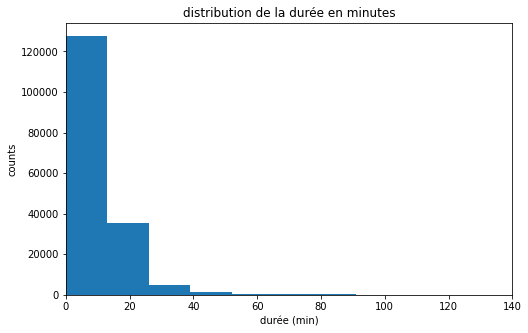

In [23]:
plt.figure(figsize=[8, 5])
binsize = np.arange(0, gobike.duration_min.max()+13, 13)
plt.hist(x=gobike.duration_min, bins=binsize)
plt.xlim((0,140))
plt.title('distribution de la durée en minutes')
plt.xlabel('durée (min)')
plt.ylabel('counts')
plt.show()

> en effet, la majeur partie des durées sont < 60 min

In [24]:
# récupérer les indexes des durées < 60 min.
duration_min_inds = gobike.query('duration_min < 60').index

count    169993.000000
mean         10.284751
std           7.361724
min           1.016667
25%           5.350000
50%           8.433333
75%          12.966667
max          59.916667
Name: duration_min, dtype: float64


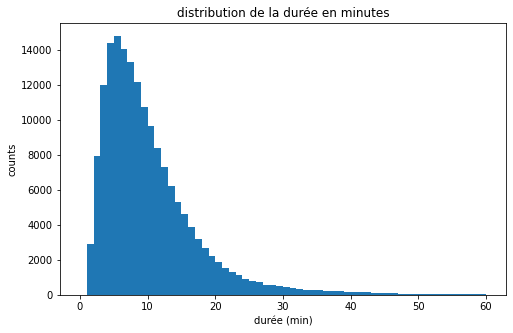

In [25]:
print(gobike.loc[duration_min_inds].duration_min.describe())

plt.figure(figsize=[8, 5])
binsize = np.arange(0, 60+1, 1)
plt.hist(data=gobike.loc[duration_min_inds], x='duration_min', bins=binsize)
plt.title('distribution de la durée en minutes')
plt.xlabel('durée (min)')
plt.ylabel('counts')
plt.show()

> Il s'agit d'une distribution asymétrique, décalée vers la droite avec un pic autour de 10 min. 75% des données sont < 13 min, et 25% restantes entre 13 et 60 min.

### Pourcentage des abonnées contre les utilisateurs non-abonnées 

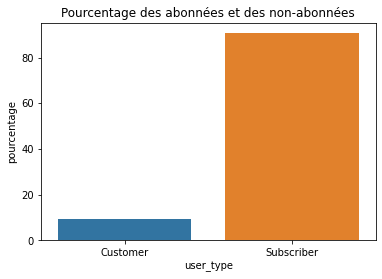

In [26]:
usertype_prop1 = props_calc('user_type')

titre='Pourcentage des abonnées et des non-abonnées'
plot_bars(usertype_prop1, 'user_type', 'pourcentage', titre)

> plus de 90% des utilisateurs sont des abonnées.

### Pourcentages des deux sexes

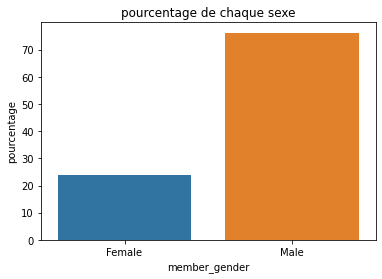

In [27]:
gender_prop1 = props_calc('member_gender')

titre='pourcentage de chaque sexe'
plot_bars(gender_prop1, 'member_gender', 'pourcentage', titre)

> Uniquement 23.8% des utilisateurs sont des femmes contre 76% d'hommes.

### Pourcentage des bénéficiaires du programme "Bike Share For All"

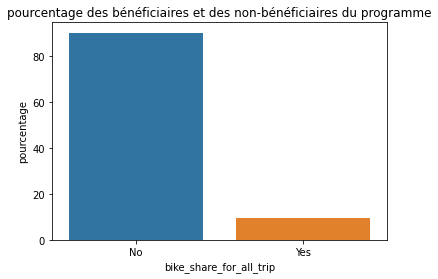

In [28]:
program_prop1 = props_calc('bike_share_for_all_trip')

titre='pourcentage des bénéficiaires et des non-bénéficiaires du programme'
plot_bars(program_prop1, 'bike_share_for_all_trip', 'pourcentage', titre)

> Seulement 9.7% des utilisateurs sont bénéficiaires du programme en question, ce qui à titre de rappel concerne les résidents à faible revenu.

### Distribution de l'age des utilisateurs

count    171305.000000
mean         34.160649
std          10.116083
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64


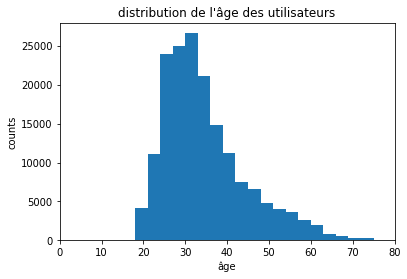

In [29]:
print(gobike.age.describe())

plt.figure()
bins2 = np.arange(0, gobike.age.max()+3, 3)
plt.hist(data=gobike, x='age', bins=bins2)
plt.xlim((0,80))
plt.title("distribution de l'âge des utilisateurs")
plt.xlabel('âge')
plt.ylabel('counts')
plt.show();

> la distribution est décalée vers la droite avec un pic autour de 30 ans. On distingue des outliers au delà de 70 ans allant jusqu'à 141 ans.
On observe que, contrairement aux attentes, le déplacement à vélos (via le système en question) n'est pas plus fréquent chez les adolescents, ou les jeunes moins de 30 ans que chez les adultes de plus de 40.

### Quelles sont les 20 stations les plus sollicitées ?

In [30]:
stations = gobike.start_station_id.value_counts()[:20].index
stations_ids = gobike.query('start_station_id in list(@stations)', engine='python').index

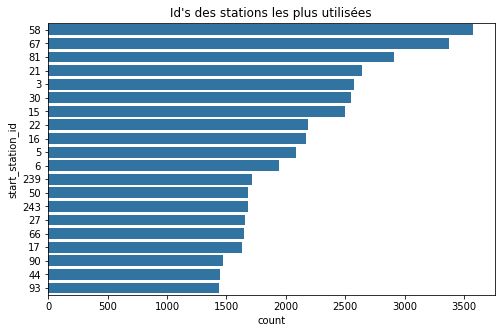

In [31]:
plt.figure(figsize=(8,5))
sb.countplot(data=gobike.loc[stations_ids], y='start_station_id', order=stations, color=monocolor)
plt.title("Id's des stations les plus utilisées")
plt.show()

In [32]:
top20_stations = list(gobike.loc[stations_ids].start_station_name.value_counts().index)
top20_stations
print("Les stations les plus sollicitées sont :")
for i in range(len(top20_stations)):
    print("{0}. {1}".format(i+1, top20_stations[i]))

Les stations les plus sollicitées sont :
1. Market St at 10th St
2. San Francisco Caltrain Station 2  (Townsend St at 4th St)
3. Berry St at 4th St
4. Montgomery St BART Station (Market St at 2nd St)
5. Powell St BART Station (Market St at 4th St)
6. San Francisco Caltrain (Townsend St at 4th St)
7. San Francisco Ferry Building (Harry Bridges Plaza)
8. Howard St at Beale St
9. Steuart St at Market St
10. Powell St BART Station (Market St at 5th St)
11. The Embarcadero at Sansome St
12. Bancroft Way at Telegraph Ave
13. 2nd St at Townsend St
14. Bancroft Way at College Ave
15. Beale St at Harrison St
16. 3rd St at Townsend St
17. Embarcadero BART Station (Beale St at Market St)
18. Townsend St at 7th St
19. Civic Center/UN Plaza BART Station (Market St at McAllister St)
20. 4th St at Mission Bay Blvd S


### Distribution des heures des trajets

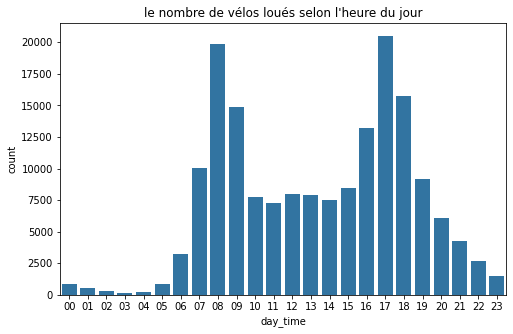

In [33]:
plt.figure(figsize=(8,5))
sb.countplot(data=gobike, x='day_time', color=monocolor)
plt.title("le nombre de vélos loués selon l'heure du jour")
plt.show()

> Il y a deux pics autour de 8h du matin et 18h du soir, avec une activité moyenne entre ces heures, durant la journée. Et comme attendu, les heures tardives de la nuit y a le moins de trajets effectués.

### Comptage des trajets selon le jour de la semaine

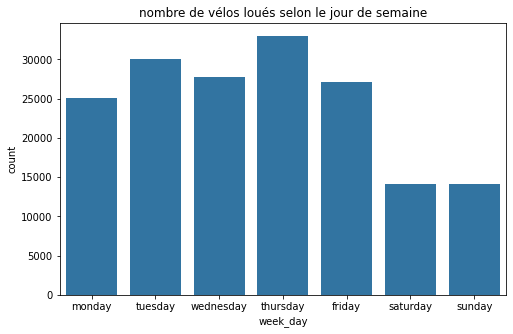

In [34]:
plt.figure(figsize=(8,5))
sb.countplot(data=gobike, x='week_day', color=monocolor)
plt.title("nombre de vélos loués selon le jour de semaine")
plt.show()

> l'activité parait clairement plus grande durant les jours de semaine contrairement au weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- durée moyenne (min) : les trajets sont majoritrairement autour de 10 min, ce qui est trois fois moins que la première option du service Gobike (30 min); cette variable contenait beaucoup d'outliers que j'ai filtré en 'lanalysant.
- abonnements : 90% des utilisateurs sont des abonnés,
- sexe : le système est beaucoup plus sollicité par les hommes (76%) que les femmes (23%),
- programme Bike Share For All : 90% des utilisateurs ne font pas partie de ce programme; il manque leur status social dans le jeu de données, il est donc impossible de conclure qu'il s'agit de résidents à faible revenus qui ignore l'existence du programme.
- âge : en moyenne autour de 30, avec les plus de 40 rivalisant avec les moins de 30 ans,
- heure des trajets : le système connait une forte demande autour des heures de pointes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Excepté l'âge et la durée, les autres données ne présentaient pas d'étranges caractéristiques. Les outliers ont été exclus en les filtrant. Pour ce qui des variables explorées, ce sont en partie des variables créer initialement avant l'analyse pour cette fin par manque d'autres données tangibles pour une enquete plus variée.

## Bivariate Exploration

### Proportions des utilisateurs par jour de semaine selon leurs sexes

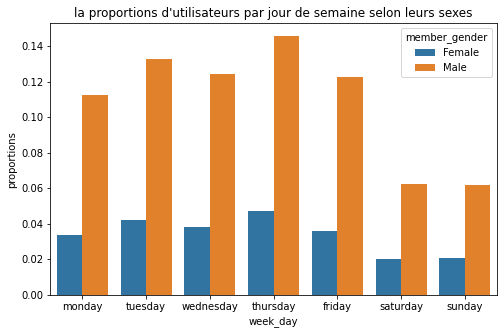

In [35]:
# this is in terms of overall proportion
gender_prop2 = props_bicalc('week_day', 'member_gender')
titre="la proportions d'utilisateurs par jour de semaine selon leurs sexes"
plot_bars(gender_prop2, 'week_day', 'proportions', titre, size=(8,5), h_var='member_gender', bar_labels=False)

> Les deux sexes semble avoir une activité similair en fonction des jours de semaine, excepté les grandes différences en nombre en faveur des hommes.

### Durée moyenne en fonction du jour de la semaine

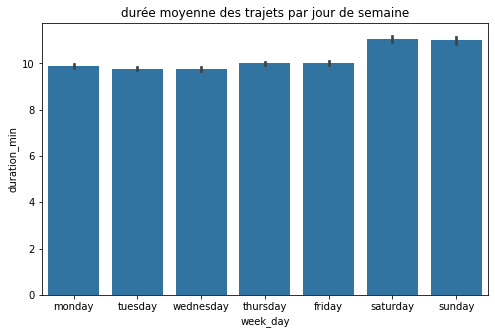

In [36]:
plt.figure(figsize=(8,5))
gobike_subdf = gobike.query('duration_min < 45')
ax = sb.barplot(data = gobike_subdf, x = 'week_day', y = 'duration_min', color=monocolor); #, truncate=False, x_jitter=0.3
ax.bar_label(ax.containers[0])
plt.title("durée moyenne des trajets par jour de semaine")
plt.show()

> La durée moyenne n'atteint même pas les 30 minutes tout au long de la semaine, y compris le weekend ou le système de vélos est le moins sollicité. Les trajets sont toutefois légérement plus longues durant le weekend.

### Proportions des utilisateurs par jour de semaine selon leurs status vis-à-vis "Bike Share for All"

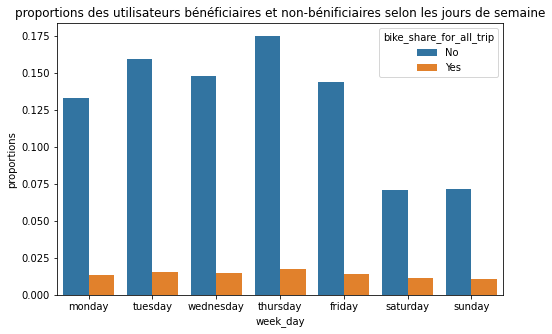

In [37]:
bike4all_prop = props_bicalc('week_day', 'bike_share_for_all_trip')
titre="proportions des utilisateurs bénéficiaires et non-bénificiaires selon les jours de semaine"
plot_bars(bike4all_prop, 'week_day', 'proportions', titre, size=(8,5), h_var='bike_share_for_all_trip', bar_labels=False)

> aucun motif particulier n'est à signaler ce qui ne suggère pas une forte corrélation. Il est à signaler toutefois que l'activité des bénéficiaires du programme semble constante à travers la semaine, contrairement aux non-bénéficiaires dont le nombre de trajets baisse presque de moitié durant le weekend.

### Proportions des utilisateurs par jour de semaine selon types

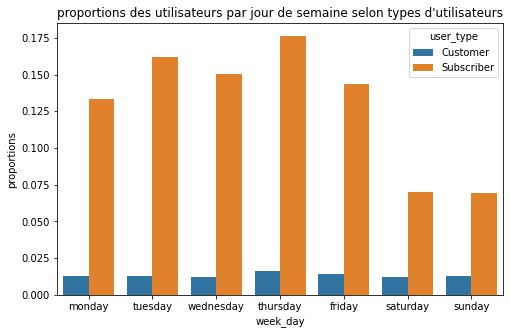

In [38]:
usertype_prop2 = props_bicalc('week_day', 'user_type')
titre="proportions des utilisateurs par jour de semaine selon types d'utilisateurs"
plot_bars(usertype_prop2, 'week_day', 'proportions', titre, size=(8,5), h_var='user_type', bar_labels=False)

> Aucune corrélation n'est à signaler. Mais, encore une fois, l'activité des abonnées baisse remarquablement durant le weekend cntrairement aux non-abonnées dont l'activité reste constante.

### Durée moyenne en fonction de l'âge des utilisateurs

In [39]:
gobike_subdf2 = gobike.query('age<75 and duration_min<60')

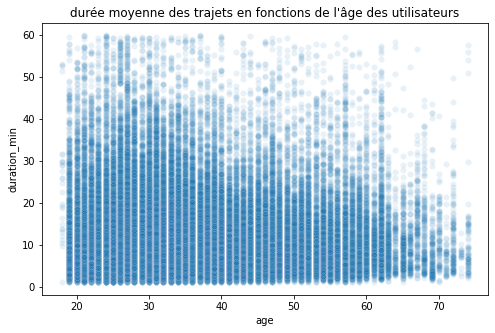

In [40]:
plt.figure(figsize=(8,5))
sb.scatterplot(data = gobike_subdf2, x = 'age', y = 'duration_min', color=monocolor, alpha=1/10) 
plt.title("durée moyenne des trajets en fonctions de l'âge des utilisateurs")
plt.show();

> Comme attendu, la durée des trajets est négativement corrélée à l'âge, avec les moins de 40 ans faisant plus de trajets entre 30-40 minutes (et 60 min pour un petit pourcentage d'entre eux). Les trajets des gens agés de plus de 40 ne dépassent pas majorir=tairement les 25 minutes.

### Durée moyenne des trajets de chaque sexe

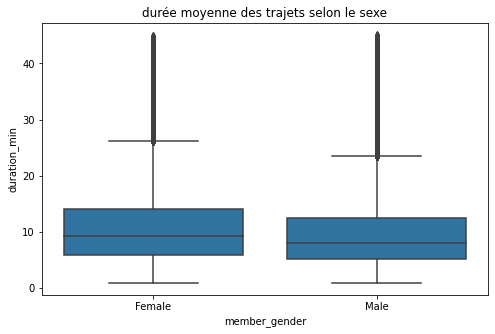

In [41]:
titre="durée moyenne des trajets selon le sexe"
plot_box(gobike_subdf, 'member_gender', 'duration_min', titre, size=(8,5))

> Les deux sexes font en moyennes des trajets de presque la même durée.

### Durée moyenne des trajets de chaque type d'utilisateurs

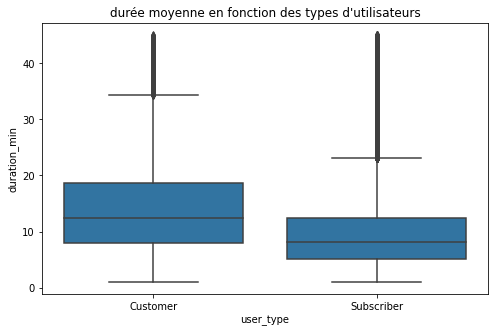

In [42]:
titre="durée moyenne en fonction des types d'utilisateurs"
plot_box(gobike_subdf, 'user_type', 'duration_min', titre, size=(8,5))

> On remarque que les abonnées font en moyenne des trajets moins longs que les clients non-abonnés.

### Durée moyenne des bénéficiares et non-bénéficiaires du programme

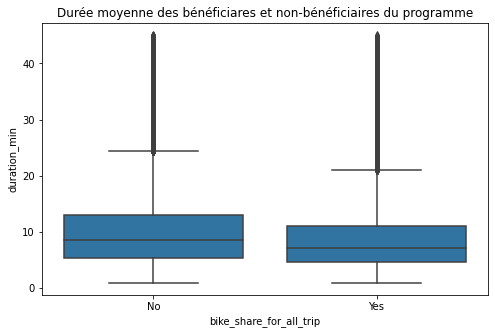

In [43]:
titre="Durée moyenne des bénéficiares et non-bénéficiaires du programme"
plot_box(gobike_subdf, 'bike_share_for_all_trip', 'duration_min', titre, size=(8,5))

> Les non-bénéficiaires font des trajets en moyenne légèrement plus longues que ceux des bénéficiaires.

### Durée moyenne en fonction de l'heure

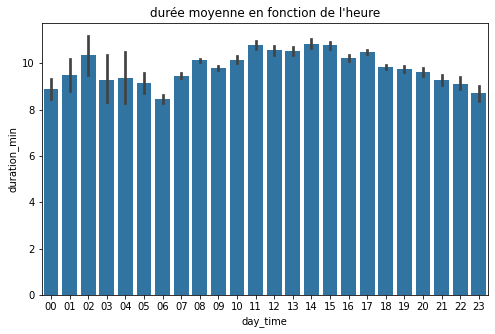

In [44]:
plt.figure(figsize=(8,5))
sb.barplot(data = gobike_subdf, x = 'day_time', y = 'duration_min', color=monocolor) #, truncate=False, x_jitter=0.3
plt.title("durée moyenne en fonction de l'heure")
plt.show();

> Il est etonnant que les heures tardives aient des trajets d'une durée moyenne presque égale à celle des trajets du jour.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- les trajets augmentent durant les jours de semaine contrairement au weekend ou l'activitée connait un seul pic autour de 15h et la durée moyenne augmente légèrement.
- les autres variables ne présentent pas un motif récurrent remarquable ou une forte corrélation à signaler.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Non.

## Multivariate Exploration


### Durée moyenne des trajets de chaque jour de semaine en fonction de l'heure

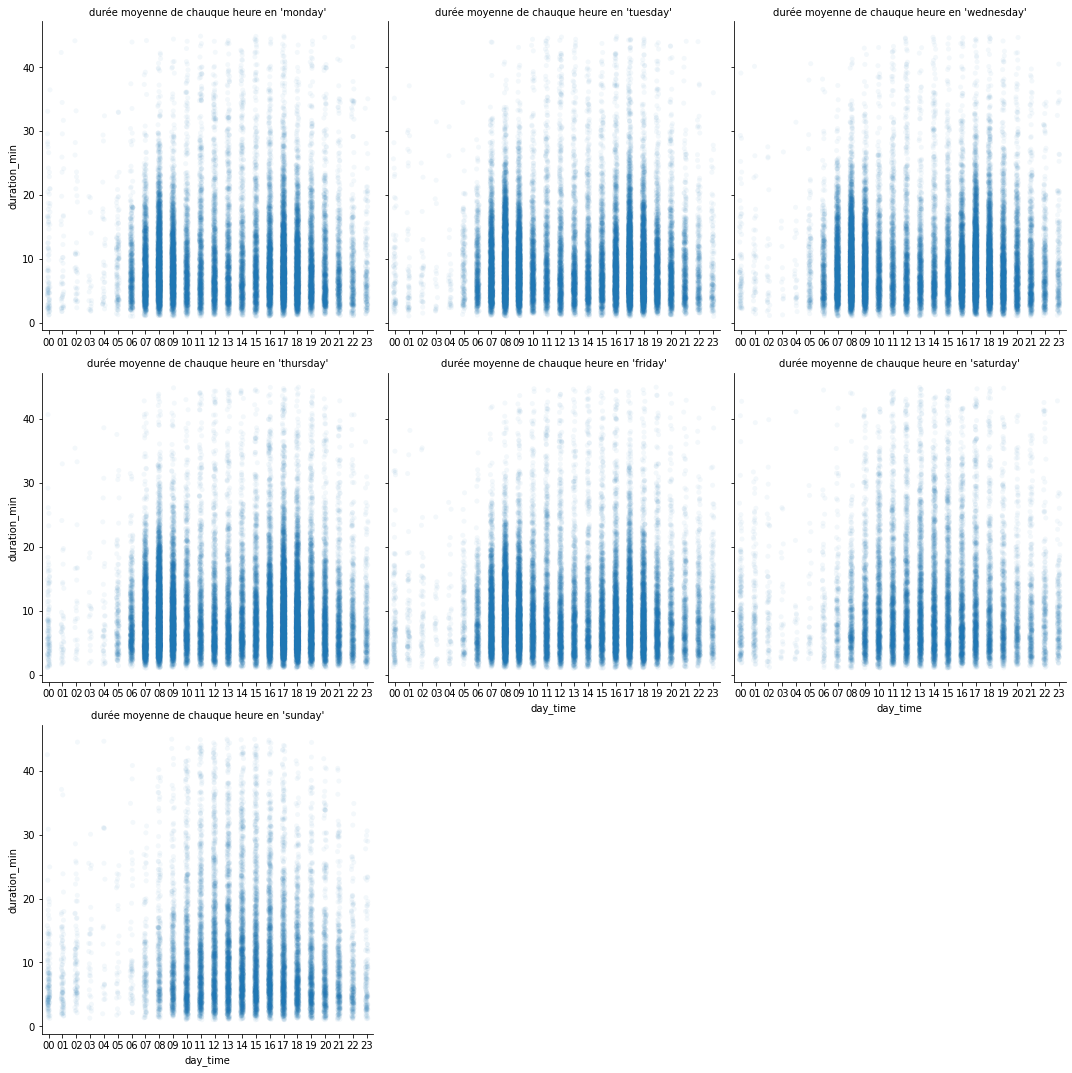

In [45]:
g = sb.FacetGrid(data = gobike_subdf, col = 'week_day', sharex=False, col_wrap = 3, height=5, aspect=1)
g.map(sb.stripplot, 'day_time', 'duration_min', color = monocolor, alpha=1/20, size=5, order=hours)
g.set_titles(col_template="durée moyenne de chauque heure en '{col_name}'")
plt.show();

> On remarque deux pics autour des heures de pointe (8h et 18h) durant la semaine. Durant le weekend on observe un autre comportement : les trajets sont concentrés autour de 15, avec un seul pic.
Les durées moyennes ne dépassent pas majoritairement les 30 min.

### Durée moyenne en fonction de l'âge de chaque sexe

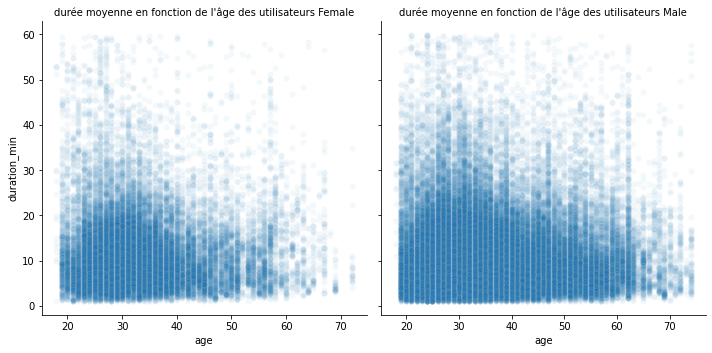

In [46]:

g = sb.FacetGrid(data = gobike_subdf2, col = 'member_gender', sharex=False, height=5, aspect=1)
g.map(sb.scatterplot, 'age', 'duration_min', color = monocolor, alpha=1/20)
g.set_titles(col_template="durée moyenne en fonction de l'âge des utilisateurs {col_name}")
plt.show()

> Ob constate que les femmes agés font beaucoup moins de trajets au delà de 10 min à apartir de l'âge de 50. COntrairement aux hommes, qui maintiennt des durées relativement longue en moyenne (entre 10 et 20 min) à cet âge là.
Comme attendu, pour les deux sexes, les trajets et leurs durées diminuent en fonction de l'age, notamment à partir de 65 ans ou c'est quasi-inexistant.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- le nombre de trajets et leurs durées dépendent bien de l'heure mais aussi jour de semaine, 
- la durée moyenne des trajets baisse en fonction de l'âge, et ce plus rapidement chez les femmes que chez les hommes qui maintiennent une durée relativement longue même après 40 ans.

### Were there any interesting or surprising interactions between features?

Non.

## Conclusions

L'analyse exploratoire est effectuée sur toutes les variables d'intérêt, en tenant compte des outliers qui se présente au fur et à mesure notamment au niveau de l'âge des utilisateurs et la durée des trajets.

l'analyse univariée a révélé le suivant:
- durée moyenne (min) : les trajets sont majoritrairement autour de 10 min, ce qui est trois fois moins que la première option du service Gobike (30 min),
- abnnements : 90% des utilisateurs sont des abonnés,
- sexe : le système est beaucoup plus sollicité par les hommes (76%) que les femmes (23%),
- programme Bike Share For All : 90% des utilisateurs ne font pas partie de ce programme; il manque leur status social dans le jeu de données, il est donc impossible de conclure qu'il s'agit de résidents à faible revenus qui ignore l'existence du programme.
- âge : en moyenne autour de 30, avec les plus de 40 rivalisant avec les moins de 30 ans,
- heure des trajets : le système connait une forte demande autour des heures de pointes.

l'analyse bivariée et multivariée:
- les trajets augmentent durant les jours de semaine contrairement au weekend ou l'activitée connait un seul pic autour de 15h et la durée moyenne augmente légèrement.
- la durée moyenne des trajets baisse en fonction de l'âge, et ce plus rapidement chez les femmes que chez les hommes qui maintiennent une durée relativement longue même après 40 ans.
- les autres variables ne présentent pas un motif récurrent remarquable ou une forte corrélation à signaler.